Assignment 4 - social network analysis

We creatad network graph using memgraph that looks at the communication between politicians and other X users. With this analysis we want to investigate whether different parties have different or overlapping twitter communities. We expect that parties with a similar political direction reach similar audiances. However, we might also expect controversial statements to receive replies from multiple political directions.

We used the following search query to view tweets that politicians posted while linking them to their party:

match (p:Party)-[e2]-(u:User)-[e1:POSTED]-(t:Tweet)-[e3]-(v:Tweet)-[e4:POSTED]-(w:User)

RETURN * 



In [25]:
import networkx as nx
import matplotlib.pyplot as plt
import itertools

After having transformed the json-file that is the output of memgraph we load to graphml file to start our analysis

In [4]:
mygraph = nx.read_graphml("memgraph-query-results-export.graphml")

Perform community mining

In [17]:
#test
G = nx.petersen_graph()
H = nx.community.louvain_communities(G, seed=123)
H

[{0, 4, 5, 7, 9}, {1, 2, 3, 6, 8}]

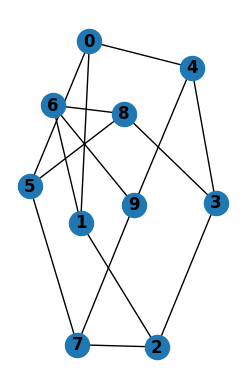

In [16]:
#test
subax1 = plt.subplot(121)
nx.draw(G, with_labels=True, font_weight='bold')

In [18]:
louv_com =nx.community.louvain_communities(mygraph, seed=12)
#change resolution to get less communities, make value smaller than 1

In [26]:
color_map = []
colors = itertools.cycle(["r", "g", "b", "y", "c", "m", "orange", "pink", "purple", "brown"])  # Extend as needed
community_colors = {node: next(colors) for community in louv_com for node in community}

In [32]:
len(community_colors)

156912

In [42]:
#first test to see if it works at all, come up with a different coloring scheme 
community_colors = {}
colors = itertools.cycle(["r", "g", "b", "y", "c", "m", "orange", "pink", "purple", "brown"])
for community in louv_com:
    color = next(colors)
    print(f"Assigning color {color}")
    for node in community:
        community_colors[node] =  color

Assigning color r
Assigning color g
Assigning color b
Assigning color y
Assigning color c
Assigning color m
Assigning color orange
Assigning color pink
Assigning color purple
Assigning color brown
Assigning color r
Assigning color g
Assigning color b
Assigning color y
Assigning color c
Assigning color m
Assigning color orange
Assigning color pink
Assigning color purple
Assigning color brown
Assigning color r
Assigning color g
Assigning color b
Assigning color y
Assigning color c
Assigning color m
Assigning color orange
Assigning color pink
Assigning color purple
Assigning color brown
Assigning color r
Assigning color g
Assigning color b
Assigning color y
Assigning color c
Assigning color m
Assigning color orange
Assigning color pink
Assigning color purple
Assigning color brown
Assigning color r
Assigning color g
Assigning color b
Assigning color y
Assigning color c
Assigning color m
Assigning color orange
Assigning color pink
Assigning color purple
Assigning color brown
Assigning color

In [54]:
community_colors

{'298215': 'r',
 '281332': 'r',
 '228951': 'r',
 '284182': 'r',
 '227016': 'r',
 '275882': 'r',
 '261027': 'r',
 '46814': 'r',
 '127147': 'r',
 '182728': 'r',
 '68069': 'r',
 '332718': 'r',
 '46851': 'r',
 '182769': 'r',
 '270844': 'r',
 '11589': 'r',
 '117122': 'r',
 '49877': 'r',
 '106652': 'r',
 '334524': 'r',
 '72622': 'r',
 '261102': 'r',
 '52409': 'r',
 '306498': 'r',
 '277191': 'r',
 '52707': 'r',
 '349513': 'r',
 '284251': 'r',
 '226327': 'r',
 '357747': 'r',
 '286713': 'r',
 '153322': 'r',
 '226222': 'r',
 '341622': 'r',
 '256817': 'r',
 '226431': 'r',
 '258973': 'r',
 '306105': 'r',
 '394133': 'r',
 '215618': 'r',
 '346863': 'r',
 '46984': 'r',
 '349715': 'r',
 '326151': 'r',
 '166618': 'r',
 '306627': 'r',
 '207031': 'r',
 '331785': 'r',
 '147723': 'r',
 '90773': 'r',
 '265106': 'r',
 '267422': 'r',
 '216166': 'r',
 '166795': 'r',
 '318098': 'r',
 '121257': 'r',
 '226240': 'r',
 '152705': 'r',
 '11263': 'r',
 '231387': 'r',
 '207035': 'r',
 '64621': 'r',
 '113346': 'r',
 '18

In [61]:
value = community_colors.get('298218', 'not found')
value

'm'

In [62]:
# Assign colors to nodes based on their community
for node in mygraph.nodes():
    color_map.append(community_colors[node])

In [64]:
# Draw the graph....this took way too long
pos = nx.spring_layout(mygraph)  # positions for all nodes
print('all positions are done')
nx.draw(mygraph, pos, node_color=color_map, with_labels=True, node_size=500, font_color='white')
print('plot is done')
# Show the plot
plt.show()

KeyboardInterrupt: 